# Import Libraries

In [1]:
#Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the dataset
df = pd.read_csv('AirPassengers.csv')
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.shape

(144, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


The data contains a particular month and number of passengers travelling in that month .

# Data Preprocessing

In [5]:
#Convert it into a Time series object and use the Month column as our index.
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [6]:
#check datatype of index
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
#convert to time series:
tdf = df['#Passengers']
tdf.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

# Data Visualization

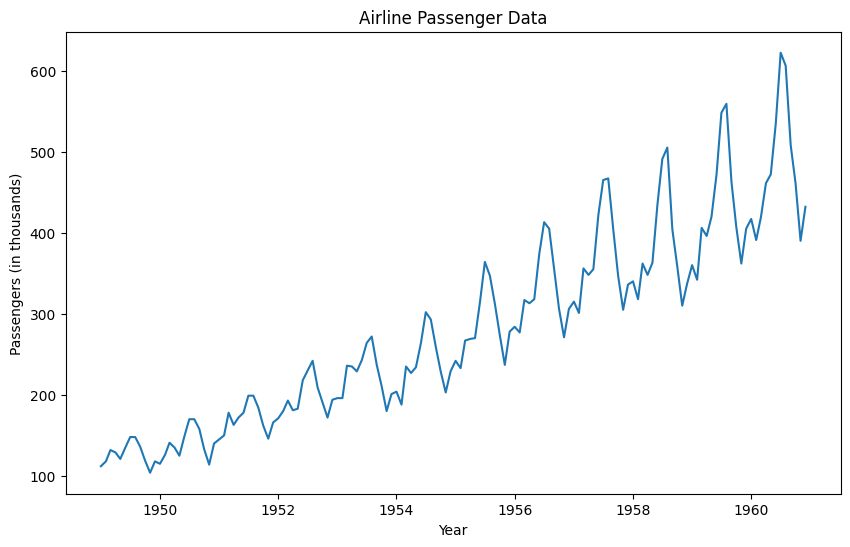

In [8]:
#Visualize time series data
#checking stationarity
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Airline Passenger Data')
plt.xlabel('Year')
plt.ylabel('Passengers (in thousands)')
plt.show()

The plot unmistakably reveals a consistent upward trend with noticeable seasonal patterns. There is signinficant upward trend in the pattern.

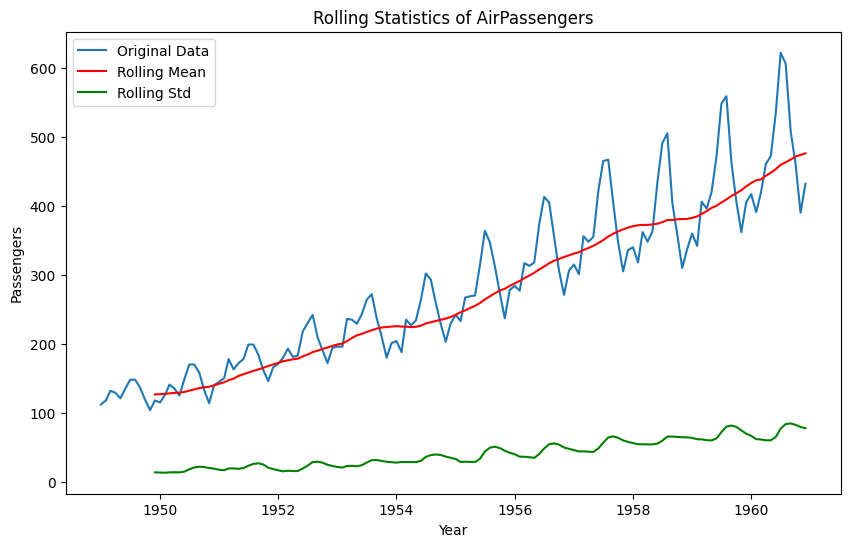

In [9]:
#Plotting the rolling mean

# Define the rolling window size (e.g., 12 for monthly data)
rolling_window = 12

# Calculate rolling mean and rolling standard deviation
rolling_mean = df['#Passengers'].rolling(window=rolling_window).mean()
rolling_std = df['#Passengers'].rolling(window=rolling_window).std()

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['#Passengers'], label='Original Data')

# Plot rolling mean
plt.plot(rolling_mean, label='Rolling Mean', color='red')

# Plot rolling standard deviation
plt.plot(rolling_std, label='Rolling Std', color='green')

plt.title('Rolling Statistics of AirPassengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
# Perform the Dickey-Fuller test
print('Dickey-Fuller Test:')
dftest = adfuller(tdf, autolag='AIC')

# Create a Series to display the test results
dfoutput = pd.Series({
    'Test Statistic': dftest[0],
    'p-value': dftest[1],
    '#Lags Used': dftest[2],
    'Number of Observations Used': dftest[3]
})

# Display the critical values
for key, value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value

print(dfoutput)

Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


**In the preceding chart, it's evident that the rolling mean exhibits a discernible trend, while the rolling standard deviation remains relatively consistent over time. The critical values are notably distant from the Test Statistics. Consequently, we can conclude that, for the current period, our Time Series does not display stationarity. From the above ADCF test result, we can see that p-value(near to 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is NOT STATIONARY**

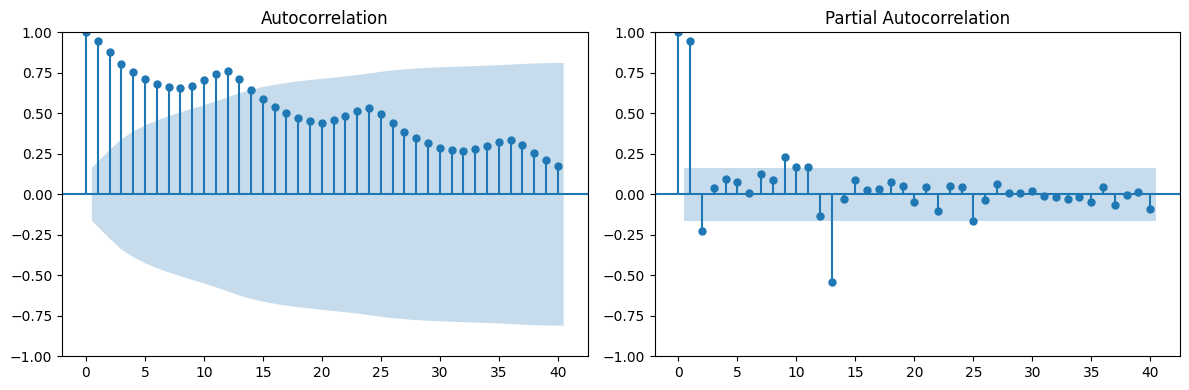

In [11]:
import statsmodels.tsa.api as smt
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df, lags=40, ax=axes[0])
smt.graphics.plot_pacf(df, lags=40, ax=axes[1])
plt.tight_layout()

In [12]:
df["year"]=[d.year for d in df.index]
df["month"]=[d.strftime('%b') for d in df.index]

In [13]:
df.head(2)

,#Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb


<Axes: xlabel='year', ylabel='#Passengers'>

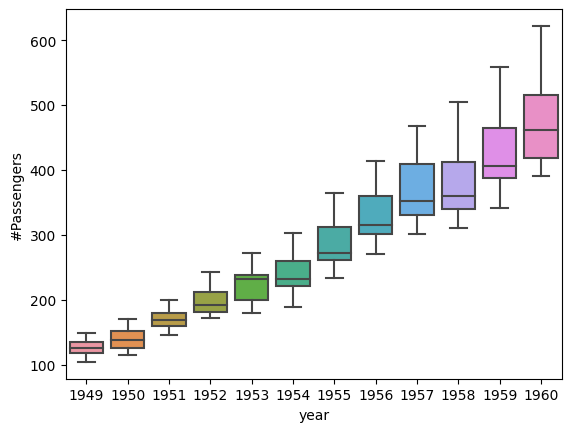

In [14]:
import seaborn as sns
sns.boxplot(x='year',y='#Passengers',data=df)

<Axes: xlabel='month', ylabel='#Passengers'>

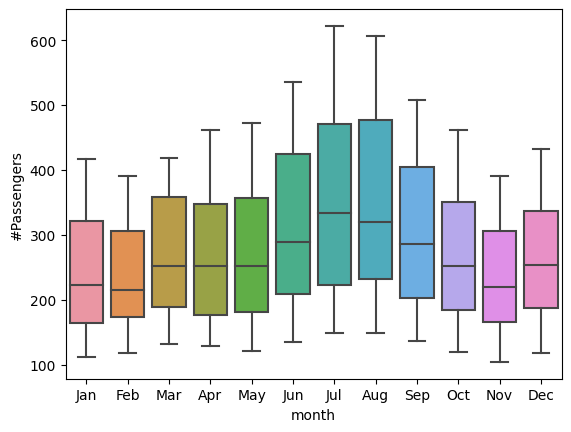

In [15]:
sns.boxplot(x='month',y='#Passengers',data=df)

**There are no outliers in the data**

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(df["#Passengers"],
                             model='additive'
                             )

In [17]:
trend=decomposed.trend
sesonal=decomposed.seasonal
residual=decomposed.resid

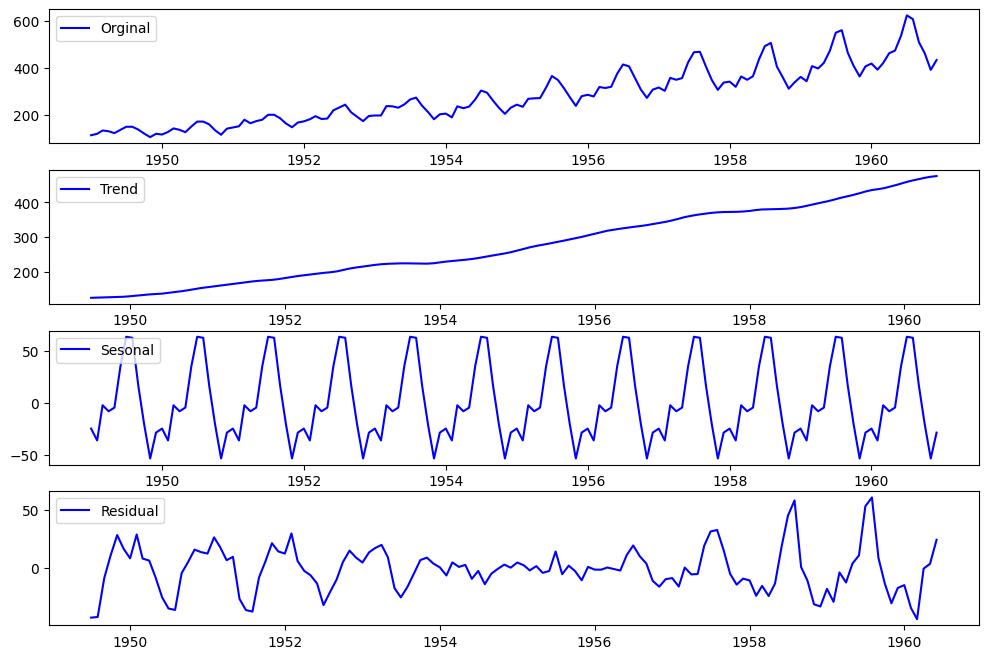

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df["#Passengers"],label="Orginal",color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal,label="Sesonal",color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='blue')
plt.legend(loc='upper left')
plt.show()

In [19]:
# Check for missing values
missing_values = df.isnull().sum()
# Handle missing values if any
missing_values

#Passengers    0
year           0
month          0
dtype: int64

**There are no null values in thge dataset**

# Data Scaling

In [20]:
#Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the data
scaler = MinMaxScaler()
df['#Passengers'] = scaler.fit_transform(df[['#Passengers']])


In [21]:
df.head(5)

,#Passengers,year,month
Month,,,
1949-01-01,0.015444,1949,Jan
1949-02-01,0.027027,1949,Feb
1949-03-01,0.054054,1949,Mar
1949-04-01,0.048263,1949,Apr
1949-05-01,0.032819,1949,May


In [22]:
df.shape

(144, 3)

# Convert the time series into a supervised learning

In [23]:
import numpy as np

# Convert to supervised learning problem
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 6
X, y = create_sequences(df['#Passengers'], n_steps)

In [24]:
X.shape

(138, 6)

# Test Train Split

In [25]:
# Split the data into training and test sets based on the index
train_end = np.where(df.index == pd.Timestamp(year=1958, month=12, day=1))[0][0]
test_start = train_end + 1

# Given the time_step, adjust the indices to get the correct split
train_end -= n_steps - 1
test_start -= n_steps

X_train, X_test = X[:train_end], X[test_start:]
y_train, y_test = y[:train_end], y[test_start:]

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(114, 6)
(114,)
(24, 6)
(24,)


In [27]:
# Reshape input to be [samples, time steps, features] which is required for LSTM/RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (114, 6, 1)
Test shape: (24, 6, 1)


# Training Model

In [28]:
# Step 3: Architecture Selection using Keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam

'''model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
'''

model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Step 4: Training
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])


Epoch 1/1000
4/4 [==============================] - 5s 493ms/step - loss: 0.1038 - val_loss: 0.2648
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0719

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 51ms/step - loss: 0.0442 - val_loss: 0.0790
Epoch 3/1000
4/4 [==============================] - 0s 75ms/step - loss: 0.0097 - val_loss: 0.0257
Epoch 4/1000
4/4 [==============================] - 0s 66ms/step - loss: 0.0130 - val_loss: 0.0296
Epoch 5/1000
4/4 [==============================] - 0s 56ms/step - loss: 0.0111 - val_loss: 0.0205
Epoch 6/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0072 - val_loss: 0.0355
Epoch 7/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0078 - val_loss: 0.0293
Epoch 8/1000
4/4 [==============================] - 0s 50ms/step - loss: 0.0063 - val_loss: 0.0186
Epoch 9/1000
4/4 [==============================] - 0s 54ms/step - loss: 0.0057 - val_loss: 0.0179
Epoch 10/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0057 - val_loss: 0.0167
Epoch 11/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.0050 - val_loss: 0.0182
Epoch 12/1000
4/4 [==

In [30]:
from keras.models import load_model
# Step 5: Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Load the best model
best_model = load_model('best_model.h5')



# Evaluation

In [31]:
# Predict on test set
y_pred = best_model.predict(X_test)


1/1 [==============================] - 0s 180ms/step


In [32]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error (MAE): {mae}')


Mean Squared Error (MSE): 0.0025703082895460953
Mean Squared Error (MAE): 0.03499714141301666


**After all the model architectural experiments and hyper-parameter tuning I got best results with Means squered error of ~0.0016 and Mean absolute error of 0.028**

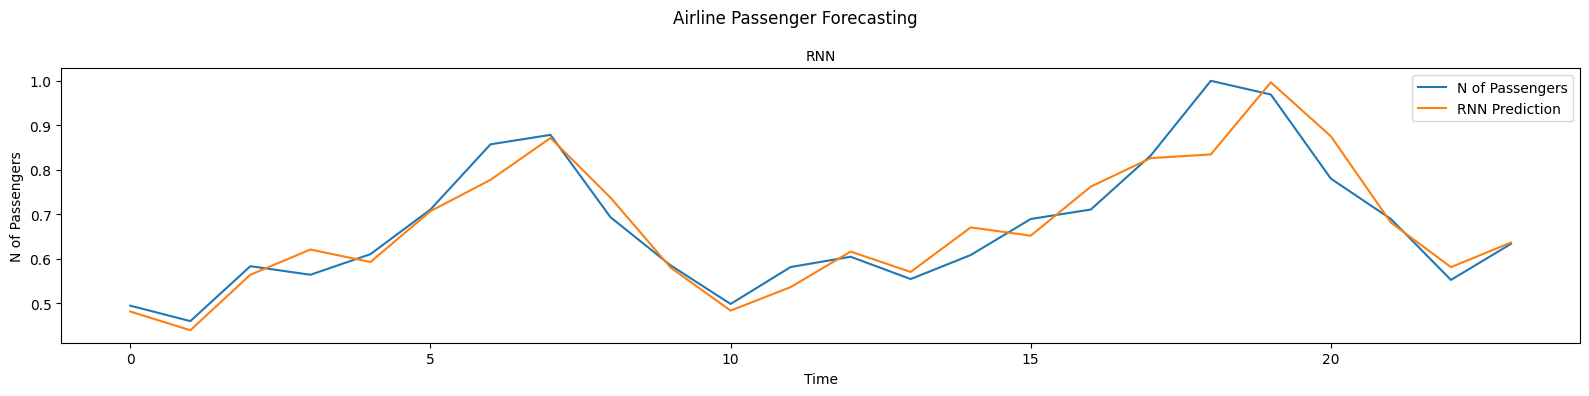

In [33]:
# Visualize Prediction Results

# Set subplot subtitles
titles = ['RNN']

# Create a list of prediction models
models = [y_pred]

# Set the plot area
fig, ax = plt.subplots(1, 1, figsize=(16,4), tight_layout=True)

# Set the title
plt.suptitle('Airline Passenger Forecasting')

# Create and show subplots
for i in range(0, 1):
    plt.subplot(1, 1,i+1)
    plt.title(titles[i], fontsize=10)
    plt.plot(y_test, label='N of Passengers')
    plt.plot(models[i], label=titles[i]+' Prediction')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('N of Passengers')

**The predicted values closely align with the underlying trend observed in the original dataset.**

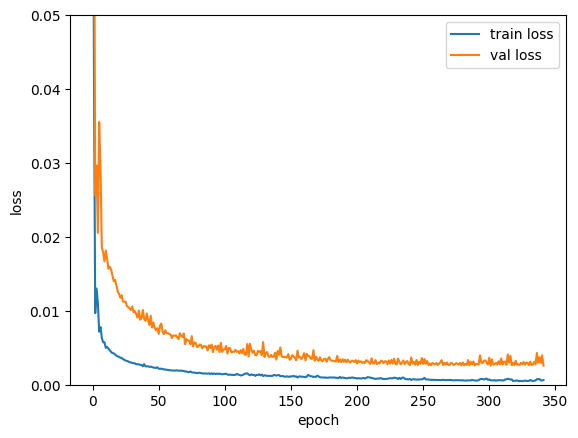

In [34]:
# Plot the learning history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.ylim([0,0.05])
plt.show()

**As the number of epochs increases, the loss decreases, as indicated by the downward trend in the graph.**

# Save Results

In [35]:
import pandas as pd

# Assuming y_pred contains your model's predictions for the test set

# Inverse transform the scaled predictions to the original scale
y_pred_original_scale = scaler.inverse_transform(y_pred)

# Create a DataFrame with the original scale predictions
submission_df = pd.DataFrame({'Month': df.index[-len(y_test):], 'Passengers': y_pred_original_scale.flatten().astype(int)})

# Save the DataFrame to a CSV file
submission_df.to_csv('AirPassengers_Prediction.csv', index=False)

# Display the first few rows of the submission DataFrame
print(submission_df.head())

       Month  Passengers
0 1959-01-01         353
1 1959-02-01         331
2 1959-03-01         396
3 1959-04-01         425
4 1959-05-01         410
